In [2]:
!nvidia-smi

Sat Nov 16 13:13:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [46]:
from IPython.display import display, HTML
js = ('<script>function ConnectButton(){ '
        'console.log("Connect pushed"); '
        'document.querySelector("#connect").click()} '
        'setInterval(ConnectButton,3000);</script>')
display(HTML(js))

In [3]:
!pip install transformers datasets soundfile speechbrain accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.8/824.8 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 45.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10

In [4]:
from huggingface_hub import notebook_login

notebook_login()

In [76]:
from datasets import load_dataset, Audio
from transformers import SpeechT5Processor
from transformers import SpeechT5ForTextToSpeech
from transformers import Seq2SeqTrainingArguments
from transformers import Seq2SeqTrainer
from transformers import SpeechT5HifiGan
from functools import partial
from collections import defaultdict
from transformers import pipeline
import os
import torch
from speechbrain.inference import EncoderClassifier
from dataclasses import dataclass
from typing import Any, Dict, List, Union
import matplotlib.pyplot as plt
import random
from IPython.display import Audio as IAudio

In [6]:
dataset = load_dataset("facebook/voxpopuli", "de", split="train")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

voxpopuli.py:   0%|          | 0.00/8.84k [00:00<?, ?B/s]

The repository for facebook/voxpopuli contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/facebook/voxpopuli.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


data/n_files.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

asr_train.tsv:   0%|          | 0.00/40.2M [00:00<?, ?B/s]

asr_dev.tsv:   0%|          | 0.00/761k [00:00<?, ?B/s]

asr_test.tsv:   0%|          | 0.00/728k [00:00<?, ?B/s]

train_part_0.tar.gz:   0%|          | 0.00/1.50G [00:00<?, ?B/s]

train_part_1.tar.gz:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

train_part_2.tar.gz:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

train_part_3.tar.gz:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

train_part_4.tar.gz:   0%|          | 0.00/1.49G [00:00<?, ?B/s]

train_part_5.tar.gz:   0%|          | 0.00/1.50G [00:00<?, ?B/s]

train_part_6.tar.gz:   0%|          | 0.00/1.51G [00:00<?, ?B/s]

train_part_7.tar.gz:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

train_part_8.tar.gz:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

train_part_9.tar.gz:   0%|          | 0.00/1.48G [00:00<?, ?B/s]

train_part_10.tar.gz:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

train_part_11.tar.gz:   0%|          | 0.00/1.51G [00:00<?, ?B/s]

train_part_12.tar.gz:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

train_part_13.tar.gz:   0%|          | 0.00/1.48G [00:00<?, ?B/s]

train_part_14.tar.gz:   0%|          | 0.00/1.48G [00:00<?, ?B/s]

train_part_15.tar.gz:   0%|          | 0.00/1.48G [00:00<?, ?B/s]

train_part_16.tar.gz:   0%|          | 0.00/1.50G [00:00<?, ?B/s]

train_part_17.tar.gz:   0%|          | 0.00/1.48G [00:00<?, ?B/s]

train_part_18.tar.gz:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

train_part_19.tar.gz:   0%|          | 0.00/1.48G [00:00<?, ?B/s]

train_part_20.tar.gz:   0%|          | 0.00/1.47G [00:00<?, ?B/s]

train_part_21.tar.gz:   0%|          | 0.00/1.03G [00:00<?, ?B/s]

dev_part_0.tar.gz:   0%|          | 0.00/603M [00:00<?, ?B/s]

test_part_0.tar.gz:   0%|          | 0.00/595M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [7]:
for example in dataset.take(2):
    print(example)

{'audio_id': '20120315-0900-PLENARY-14-de_20120315-16:29:53_3', 'language': 1, 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/087d32c0853da45d490e18b778ac2507443b8b6dcd66c27208cd9d4431980304/train_part_0/20120315-0900-PLENARY-14-de_20120315-16:29:53_3.wav', 'array': array([-0.1496582 , -0.14880371, -0.12649536, ..., -0.00421143,
        0.01269531,  0.03085327]), 'sampling_rate': 16000}, 'raw_text': 'Natürlich gibt es Übergriffe des Herrscherhauses und des Sicherheitsapparates und der Saudis, die sich dahinter verstecken und die gerne Bahrain in ihren Staat integrieren würden.', 'normalized_text': 'natürlich gibt es übergriffe des herrscherhauses und des sicherheitsapparates und der saudis die sich dahinter verstecken und die gerne bahrain in ihren staat integrieren würden.', 'gender': 'male', 'speaker_id': '2229', 'is_gold_transcript': True, 'accent': 'None'}
{'audio_id': '20131008-0900-PLENARY-13-de_20131008-17:44:02_1', 'language': 1, 'audio': {'path': '/ro

In [8]:
dataset = dataset.cast_column("audio", Audio(sampling_rate=16000))

In [9]:
checkpoint = "microsoft/speecht5_tts"
processor = SpeechT5Processor.from_pretrained(checkpoint)

preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

In [10]:
tokenizer = processor.tokenizer

In [11]:
dataset.take(1)['audio']

[{'path': '/root/.cache/huggingface/datasets/downloads/extracted/087d32c0853da45d490e18b778ac2507443b8b6dcd66c27208cd9d4431980304/train_part_0/20120315-0900-PLENARY-14-de_20120315-16:29:53_3.wav',
  'array': array([-0.1496582 , -0.14880371, -0.12649536, ..., -0.00421143,
          0.01269531,  0.03085327]),
  'sampling_rate': 16000}]

In [12]:
import math

def find_10_hour_index(dataset):

    total_duration = 0
    ten_hours_in_seconds = 10 * 60 * 60

    for i, example in enumerate(dataset):
      total_duration += len(example['audio']['array']) / example['audio']['sampling_rate']
      if total_duration >= ten_hours_in_seconds:
          return i
    return -1

# Example usage (assuming 'dataset' is defined as in your previous code):
index = find_10_hour_index(dataset)

if index != -1:
    print(f"Cumulative audio duration exceeds 10 hours at index {index}.")
    sliced_dataset = dataset.take(index + 1)
else:
    print("Cumulative audio duration does not reach 10 hours within the dataset.")
    sliced_dataset = dataset.take(index + 1)

Cumulative audio duration exceeds 10 hours at index 4030.


In [13]:
from IPython.display import Audio

example = sliced_dataset[0]
print("Normalized Text:", example["normalized_text"])
print("Default Text:", example["raw_text"])

Audio(data=example["audio"]["array"], rate=example["audio"]["sampling_rate"])


Normalized Text: natürlich gibt es übergriffe des herrscherhauses und des sicherheitsapparates und der saudis die sich dahinter verstecken und die gerne bahrain in ihren staat integrieren würden.
Default Text: Natürlich gibt es Übergriffe des Herrscherhauses und des Sicherheitsapparates und der Saudis, die sich dahinter verstecken und die gerne Bahrain in ihren Staat integrieren würden.


In [14]:
def extract_all_chars(batch):
    all_text = " ".join(batch['normalized_text'])
    vocab = list(set(all_text))
    return {"vocab": [vocab], "all_text": [all_text]}

In [15]:
vocabs = sliced_dataset.map(extract_all_chars,
                            batched=True,
                            batch_size=-1,
                            keep_in_memory=True,
                            remove_columns=sliced_dataset.column_names)

Map:   0%|          | 0/4031 [00:00<?, ? examples/s]

In [16]:
len(sliced_dataset)

4031

In [17]:
dataset_vocab = set(vocabs['vocab'][0])
tokenizer_vocab = set(tokenizer.get_vocab().keys())

In [18]:
dataset_vocab - tokenizer_vocab

{' ', 'ß', 'ä', 'ö', 'ü'}

In [19]:
def replace_chars(inputs):
    replacement_map = {
        'ß': 'ss',
        'ä': 'ae',
        'ö': 'oe',
        'ü': 'ue',
        ' ': ' '
    }
    for char, replacement in replacement_map.items():
        inputs["normalized_text"] = inputs["normalized_text"].replace(char, replacement)
    return inputs

sliced_dataset = sliced_dataset.map(replace_chars)

Map:   0%|          | 0/4031 [00:00<?, ? examples/s]

In [20]:
sliced_dataset.take(1)

Dataset({
    features: ['audio_id', 'language', 'audio', 'raw_text', 'normalized_text', 'gender', 'speaker_id', 'is_gold_transcript', 'accent'],
    num_rows: 1
})

In [21]:
speaker_counts = defaultdict(int)

for speaker_id in sliced_dataset['speaker_id']:
    speaker_counts[speaker_id] += 1

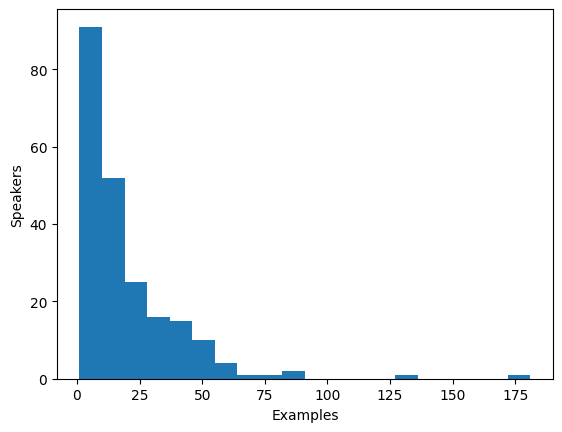

In [22]:
plt.figure()
plt.hist(speaker_counts.values(), bins=20)
plt.ylabel("Speakers")
plt.xlabel("Examples")
plt.show()

In [23]:
def select_speaker(speaker_id):
    return 100 <= speaker_counts[speaker_id] <= 400


dataset = dataset.filter(select_speaker, input_columns=["speaker_id"])

Filter:   0%|          | 0/108473 [00:00<?, ? examples/s]

In [24]:
len(set(sliced_dataset["speaker_id"]))

219

In [25]:
spk_model_name = 'speechbrain/spkrec-xvect-voxceleb'

device = 'cuda' if torch.cuda.is_available() else 'cpu'

speaker_model = EncoderClassifier.from_hparams(source=spk_model_name,
                                          run_opts={"device": device},
                                           savedir=os.path.join("/tmp", spk_model_name))

hyperparams.yaml:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/speechbrain/utils/autocast.py:68: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  wrapped_fwd = torch.cuda.amp.custom_fwd(fwd, cast_inputs=cast_inputs)


embedding_model.ckpt:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/15.9M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/speechbrain/utils/checkpoints.py:200: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path, map_location=device

In [26]:
def create_speaker_embedding(waveform):
      with torch.no_grad():
          speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform).unsqueeze(0))
          speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
          speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
      return speaker_embeddings

In [27]:
def prepare_dataset(example):
    audio = example["audio"]

    example = processor(
        text=example["normalized_text"],
        audio_target=audio["array"],
        sampling_rate=audio["sampling_rate"],
        return_attention_mask=False,
    )

    example["labels"] = example["labels"][0]

    example["speaker_embeddings"] = create_speaker_embedding(audio["array"])

    return example

In [28]:
example = sliced_dataset.take(1)
example['audio']

[{'path': '/root/.cache/huggingface/datasets/downloads/extracted/087d32c0853da45d490e18b778ac2507443b8b6dcd66c27208cd9d4431980304/train_part_0/20120315-0900-PLENARY-14-de_20120315-16:29:53_3.wav',
  'array': array([-0.1496582 , -0.14880371, -0.12649536, ..., -0.00421143,
          0.01269531,  0.03085327]),
  'sampling_rate': 16000}]

In [29]:
processed_example = prepare_dataset(sliced_dataset[0])
list(processed_example.keys())

['input_ids', 'labels', 'speaker_embeddings']

In [30]:
processed_example["speaker_embeddings"].shape

(512,)

In [31]:
processed_example["labels"]

array([[-0.8779009 , -0.57177967, -0.27140585, ..., -2.4133604 ,
        -2.2272208 , -2.8018713 ],
       [-1.1943076 , -0.4142984 , -0.2940037 , ..., -2.134496  ,
        -2.025393  , -2.5616114 ],
       [-1.4135864 , -0.41480315, -0.24572678, ..., -2.0341544 ,
        -1.9935911 , -2.2453277 ],
       ...,
       [-2.180839  , -2.2675285 , -2.000573  , ..., -2.1442957 ,
        -2.3056498 , -2.786022  ],
       [-2.4425576 , -2.5430067 , -2.2086787 , ..., -2.1267812 ,
        -2.3286731 , -2.6519833 ],
       [-2.3847857 , -2.3029053 , -1.9230125 , ..., -2.1001446 ,
        -2.410599  , -2.7562122 ]], dtype=float32)

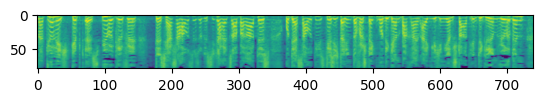

In [32]:
plt.figure()
plt.imshow(processed_example["labels"].T)
plt.show()

In [33]:
sliced_dataset = sliced_dataset.map(prepare_dataset, remove_columns=dataset.column_names)

Map:   0%|          | 0/4031 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1112 > 600). Running this sequence through the model will result in indexing errors


In [34]:
sliced_dataset

Dataset({
    features: ['input_ids', 'labels', 'speaker_embeddings'],
    num_rows: 4031
})

In [35]:
def is_not_too_long(input_ids):
    input_length = len(input_ids)
    return input_length < 200


sliced_dataset = sliced_dataset.filter(is_not_too_long, input_columns=["input_ids"])
len(sliced_dataset)

Filter:   0%|          | 0/4031 [00:00<?, ? examples/s]

3059

In [36]:
sliced_dataset = sliced_dataset.train_test_split(test_size=0.1)

In [37]:
@dataclass
class TTSDataCollatorWithPadding:
    processor: Any

    def __call__(
        self, features: List[Dict[str, Union[List[int], torch.Tensor]]]
    ) -> Dict[str, torch.Tensor]:
        input_ids = [{"input_ids": feature["input_ids"]} for feature in features]
        label_features = [{"input_values": feature["labels"]} for feature in features]
        speaker_features = [feature["speaker_embeddings"] for feature in features]

        # collate the inputs and targets into a batch
        batch = processor.pad(
            input_ids=input_ids, labels=label_features, return_tensors="pt"
        )

        # replace padding with -100 to ignore loss correctly
        batch["labels"] = batch["labels"].masked_fill(
            batch.decoder_attention_mask.unsqueeze(-1).ne(1), -100
        )

        # not used during fine-tuning
        del batch["decoder_attention_mask"]

        # round down target lengths to multiple of reduction factor
        if model.config.reduction_factor > 1:
            target_lengths = torch.tensor(
                [len(feature["input_values"]) for feature in label_features]
            )
            target_lengths = target_lengths.new(
                [
                    length - length % model.config.reduction_factor
                    for length in target_lengths
                ]
            )
            max_length = max(target_lengths)
            batch["labels"] = batch["labels"][:, :max_length]

        # also add in the speaker embeddings
        batch["speaker_embeddings"] = torch.tensor(speaker_features)

        return batch

In [38]:
data_collator = TTSDataCollatorWithPadding(processor=processor)

In [39]:
model = SpeechT5ForTextToSpeech.from_pretrained(checkpoint)

config.json:   0%|          | 0.00/2.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/585M [00:00<?, ?B/s]

In [40]:
model.config.use_cache = False
model.generate = partial(model.generate, use_cache=True)

In [41]:
training_args = Seq2SeqTrainingArguments(
    output_dir="speecht5_finetuned_voxpopuli_de",
    per_device_train_batch_size=4,
    gradient_accumulation_steps=8,
    learning_rate=1e-5,
    warmup_steps=500,
    max_steps=4000,
    gradient_checkpointing=True,
    fp16=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=2,
    save_steps=1000,
    eval_steps=1000,
    logging_steps=25,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    greater_is_better=False,
    label_names=["labels"],
    push_to_hub=True,
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [49]:
trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=sliced_dataset["train"],
    eval_dataset=sliced_dataset["test"],
    data_collator=data_collator,
    tokenizer=processor,
)

<ipython-input-49-51111a81d31e>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
max_steps is given, it will override any value given in num_train_epochs


In [50]:
trainer.train()

Step,Training Loss,Validation Loss
1000,0.526500,0.485982
2000,0.502900,0.474044
3000,0.498400,0.472146
4000,0.496500,0.470817


/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:2817: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 1876}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=4000, training_loss=0.5268438875675201, metrics={'train_runtime': 7569.18, 'train_samples_per_second': 16.911, 'train_steps_per_second': 0.528, 'total_flos': 1.7291685751808688e+16, 'train_loss': 0.5268438875675201, 'epoch': 46.44412191582003})

In [51]:
trainer.push_to_hub()

CommitInfo(commit_url='https://huggingface.co/ahk-d/speecht5_finetuned_voxpopuli_de/commit/f8d4ca958006e881a2228df5089e9a184063bc63', commit_message='End of training', commit_description='', oid='f8d4ca958006e881a2228df5089e9a184063bc63', pr_url=None, repo_url=RepoUrl('https://huggingface.co/ahk-d/speecht5_finetuned_voxpopuli_de', endpoint='https://huggingface.co', repo_type='model', repo_id='ahk-d/speecht5_finetuned_voxpopuli_de'), pr_revision=None, pr_num=None)

In [88]:
def generate_speech_with_random_speaker(text):
    dataset = sliced_dataset['test']
    processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")
    model = SpeechT5ForTextToSpeech.from_pretrained("ahk-d/speecht5_finetuned_voxpopuli_de")
    vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")
    random_index = random.randint(0, len(dataset) - 1)
    example = dataset[random_index]
    speaker_embeddings = torch.tensor(example["speaker_embeddings"]).unsqueeze(0)

    inputs = processor(text=text, return_tensors="pt")
    speech = model.generate_speech(inputs["input_ids"], speaker_embeddings, vocoder=vocoder)

    return IAudio(speech.numpy(), rate=16000)

In [89]:
generate_speech_with_random_speaker('das ist nicht meine katze')

In [90]:
generate_speech_with_random_speaker('ich bin ein roboter')